In [2]:
import pandas as pd

df = pd.read_csv(r'C:\Users\MadiL\CS110 CodeBase\U.S._Chronic_Disease_Indicators.csv')
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311745 entries, 0 to 311744
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  311745 non-null  int64  
 1   YearEnd                    311745 non-null  int64  
 2   LocationAbbr               311745 non-null  object 
 3   LocationDesc               311745 non-null  object 
 4   DataSource                 311745 non-null  object 
 5   Topic                      311745 non-null  object 
 6   Question                   311745 non-null  object 
 7   Response                   0 non-null       float64
 8   DataValueUnit              311745 non-null  object 
 9   DataValueType              311745 non-null  object 
 10  DataValue                  210684 non-null  float64
 11  DataValueAlt               210684 non-null  float64
 12  DataValueFootnoteSymbol    102758 non-null  object 
 13  DataValueFootnote          10

## Cleaning

In [3]:
#Finding columns that are completely empty
empty_columns = df.columns[df.isna().all()].tolist()
print(empty_columns)

#Dropping these columns
for column in empty_columns:
    df.drop(column, axis=1, errors='ignore', inplace=True)



['Response', 'StratificationCategory2', 'Stratification2', 'StratificationCategory3', 'Stratification3', 'ResponseID', 'StratificationCategoryID2', 'StratificationID2', 'StratificationCategoryID3', 'StratificationID3']


In [4]:
#Finding other NaNs
nan_counts = df.isna().sum()
nan_columns = nan_counts[nan_counts > 0]

#Subsetting dataframe to only include rows where DataValueFootnoteSymbol is NaN
##Since this seems to mark missing data
df_subset = df[df['DataValueFootnoteSymbol'].isna()]

#Finding other NaNs in subset
subset_nan_counts = df_subset.isna().sum()
subset_nan_columns = subset_nan_counts[nan_counts > 0]
print(subset_nan_columns)



DataValue                       0
DataValueAlt                    0
DataValueFootnoteSymbol    208987
DataValueFootnote          208987
LowConfidenceLimit          20138
HighConfidenceLimit         20133
Geolocation                  5102
dtype: int64


In [5]:
#Dropping DataValueFootnote and DataValueFootnoteSymbol from the subset
df_subset.drop(['DataValueFootnoteSymbol', 'DataValueFootnote'], axis=1, inplace=True)

C:\Users\MadiL\AppData\Local\Temp\ipykernel_6544\2059213610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset.drop(['DataValueFootnoteSymbol', 'DataValueFootnote'], axis=1, inplace=True)


## Exploratory Data Analysis

In [6]:
df_subset.to_csv('Epidemiology.csv')

In [16]:
df_subset

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,HighConfidenceLimit,StratificationCategory1,Stratification1,Geolocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
0,2019,2019,GA,Georgia,BRFSS,Disability,Adults with any disability,%,Crude Prevalence,44.0,...,47.1,Age,Age >=65,POINT (-83.62758034599966 32.83968109300048),13,DIS,DIS01,CRDPREV,AGE,AGE65P
1,2019,2019,GU,Guam,BRFSS,Arthritis,Arthritis among adults,%,Crude Prevalence,15.9,...,18.9,Sex,Female,POINT (144.793731 13.444304),66,ART,ART01,CRDPREV,SEX,SEXF
2,2019,2019,GU,Guam,BRFSS,Immunization,Influenza vaccination among adults,%,Crude Prevalence,30.0,...,34.0,Sex,Male,POINT (144.793731 13.444304),66,IMM,IMM01,CRDPREV,SEX,SEXM
3,2019,2019,ME,Maine,BRFSS,Diabetes,Diabetes among adults,%,Crude Prevalence,11.4,...,12.7,Sex,Male,POINT (-68.98503133599962 45.254228894000505),23,DIA,DIA01,CRDPREV,SEX,SEXM
4,2019,2019,NV,Nevada,NVSS,Health Status,Life expectancy at birth,Years,Number,78.0,...,78.2,Overall,Overall,POINT (-117.07184056399967 39.493240390000494),32,HEA,HEA06,NMBR,OVERALL,OVR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311739,2022,2022,VT,Vermont,BRFSS,Mental Health,Average mentally unhealthy days among adults,Number,Crude Mean,7.2,...,7.7,Age,Age 18-44,POINT (-72.51764079099962 43.62538123900049),50,MEN,MEN04,CRDMEAN,AGE,AGE1844
311740,2022,2022,VA,Virginia,BRFSS,"Nutrition, Physical Activity, and Weight Status",Obesity among adults,%,Age-adjusted Prevalence,31.6,...,40.0,Race/Ethnicity,"Multiracial, non-Hispanic",POINT (-78.45789046299967 37.54268067400045),51,NPAW,NPW14,AGEADJPREV,RACE,MRC
311741,2022,2022,WA,Washington,BRFSS,Sleep,Short sleep duration among adults,%,Crude Prevalence,25.3,...,26.6,Age,Age >=65,POINT (-120.47001078999972 47.52227862900048),53,SLEP,SLP03,CRDPREV,AGE,AGE65P
311743,2022,2022,VI,Virgin Islands,BRFSS,Mental Health,Frequent mental distress among adults,%,Crude Prevalence,8.3,...,14.5,Sex,Male,POINT (-64.896335 18.335765),78,MEN,MEN05,CRDPREV,SEX,SEXM


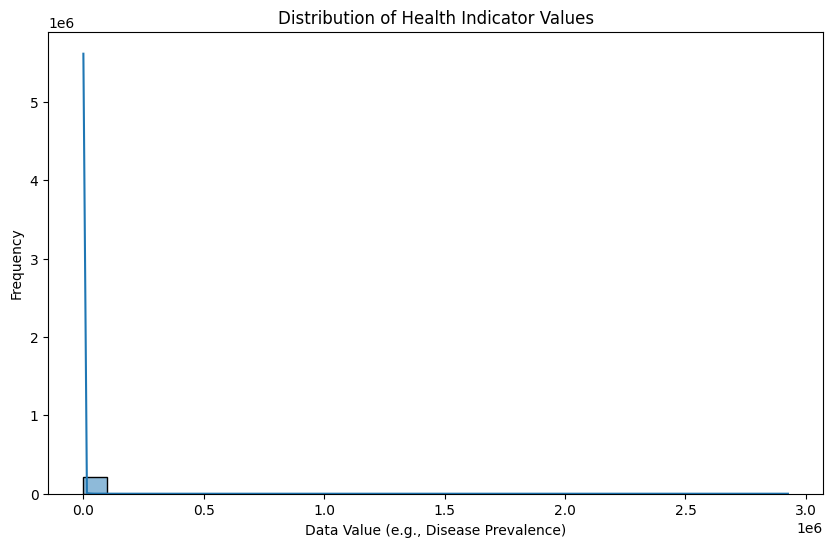

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of DataValue (e.g., disease prevalence)
plt.figure(figsize=(10, 6))
sns.histplot(df_subset['DataValue'], bins=30, kde=True)
plt.title('Distribution of Health Indicator Values')
plt.xlabel('Data Value (e.g., Disease Prevalence)')
plt.ylabel('Frequency')
plt.show()
